<a href="https://colab.research.google.com/github/derekedgar23/Misc.-Data-Projects/blob/main/2024TexasTechFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis Of 2024 Texas Tech Football Players and Game Situations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [4]:
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/texastechfootball.csv'

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/texastechfootball.csv')

In [7]:
df.head()

,Season,Id,Name,Position,Team,Conference,AveragePPA All,AveragePPA Pass,AveragePPA Rush,AveragePPA FirstDown,...,AveragePPA StandardDowns,AveragePPA PassingDowns,TotalPPA All,TotalPPA Pass,TotalPPA Rush,TotalPPA FirstDown,TotalPPA SecondDown,TotalPPA ThirdDown,TotalPPA StandardDowns,TotalPPA PassingDowns
0,2024,5139854,Trey Jackson,TE,Texas Tech,Big 12,-0.258,-0.258,0.000,0.000,...,-0.258,0.000,-0.258,-0.258,0.000,0.000,0.000,-0.258,-0.258,0.000
1,2024,5147344,Tyson Turner,WR,Texas Tech,Big 12,-0.056,-0.056,0.000,0.000,...,0.000,-0.056,-0.056,-0.056,0.000,0.000,0.000,-0.056,0.000,-0.056
2,2024,4587705,Cam'Ron Valdez,RB,Texas Tech,Big 12,0.020,-0.716,0.102,0.006,...,0.074,-0.463,0.200,-0.716,0.916,0.038,-0.893,1.055,0.664,-0.463
3,2024,5193926,Cameran Brown,QB,Texas Tech,Big 12,0.071,-0.516,0.659,0.323,...,0.147,-0.258,1.141,-4.128,5.268,2.583,-2.179,0.737,1.916,-0.775
4,2024,4714278,Jason Llewellyn,TE,Texas Tech,Big 12,0.089,0.089,0.000,0.000,...,0.089,0.000,0.177,0.177,0.000,0.000,0.000,0.000,0.177,0.000


In [8]:
df.tail()

,Season,Id,Name,Position,Team,Conference,AveragePPA All,AveragePPA Pass,AveragePPA Rush,AveragePPA FirstDown,...,AveragePPA StandardDowns,AveragePPA PassingDowns,TotalPPA All,TotalPPA Pass,TotalPPA Rush,TotalPPA FirstDown,TotalPPA SecondDown,TotalPPA ThirdDown,TotalPPA StandardDowns,TotalPPA PassingDowns
16,2024,4575558,Josh Kelly,WR,Texas Tech,Big 12,1.134,1.206,-0.478,0.756,...,1.094,1.183,106.586,108.498,-1.912,24.960,21.497,53.629,56.905,49.681
17,2024,4916941,Coy Eakin,WR,Texas Tech,Big 12,1.159,1.159,0.000,1.055,...,0.939,1.489,75.338,75.338,0.000,28.497,28.887,21.972,36.630,38.709
18,2024,4686373,Jordan Brown,WR,Texas Tech,Big 12,1.232,1.232,0.000,0.426,...,1.228,1.234,12.316,12.316,0.000,0.852,3.495,5.156,4.910,7.405
19,2024,4692538,Jalin Conyers,TE,Texas Tech,Big 12,1.554,1.590,1.358,0.974,...,1.334,2.048,60.613,52.462,8.151,10.713,10.201,28.317,36.031,24.581
20,2024,4877773,Johncarlos Miller II,TE,Texas Tech,Big 12,2.349,2.349,0.000,0.000,...,2.803,1.895,28.187,28.187,0.000,0.000,13.169,12.303,16.815,11.371


In [9]:
df.describe()

,Season,Id,AveragePPA All,AveragePPA Pass,AveragePPA Rush,AveragePPA FirstDown,AveragePPA SecondDown,AveragePPA ThirdDown,AveragePPA StandardDowns,AveragePPA PassingDowns,TotalPPA All,TotalPPA Pass,TotalPPA Rush,TotalPPA FirstDown,TotalPPA SecondDown,TotalPPA ThirdDown,TotalPPA StandardDowns,TotalPPA PassingDowns
count,21.0,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2024.0,4.844523e+06,0.630381,0.597952,0.260667,0.365381,0.495095,0.990095,0.587810,0.687571,38.535857,31.090143,7.445714,9.984143,8.379000,17.475381,21.999905,16.535810
std,0.0,2.551903e+05,0.618067,0.712147,0.543522,0.377776,0.653088,0.889890,0.676604,0.737307,56.546933,53.607190,20.833771,14.303843,10.689485,31.028498,30.341844,27.464252
min,2024.0,4.429299e+06,-0.258000,-0.716000,-0.478000,0.000000,-0.726000,-0.379000,-0.258000,-0.463000,-0.258000,-4.128000,-1.912000,0.000000,-2.179000,-0.379000,-0.862000,-0.775000
25%,2024.0,4.594319e+06,0.320000,0.243000,0.000000,0.021000,0.000000,0.147000,0.147000,0.000000,1.141000,0.557000,0.000000,0.063000,0.000000,0.737000,0.635000,0.000000
50%,2024.0,4.877773e+06,0.449000,0.526000,0.000000,0.314000,0.459000,1.055000,0.361000,0.535000,15.570000,8.696000,0.000000,2.583000,3.495000,5.156000,8.978000,5.764000
75%,2024.0,5.086393e+06,1.059000,1.059000,0.316000,0.534000,0.935000,1.676000,0.939000,1.234000,60.613000,28.187000,7.131000,17.491000,15.469000,20.504000,36.031000,24.581000
max,2024.0,5.193926e+06,2.349000,2.349000,1.986000,1.267000,1.881000,3.076000,2.803000,2.048000,227.825000,220.694000,95.667000,46.085000,34.028000,132.520000,112.171000,115.654000


In [10]:
df.isnull().sum()

,0
Season,0
Id,0
Name,0
Position,0
Team,0
Conference,0
AveragePPA All,0
AveragePPA Pass,0
AveragePPA Rush,0
AveragePPA FirstDown,0


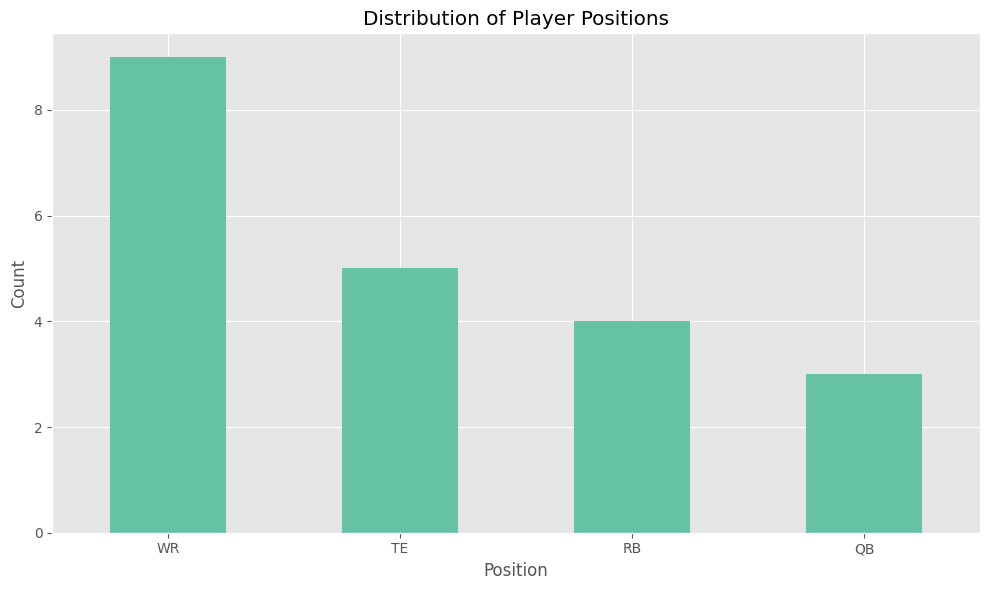

In [11]:
# Distributin of Positions

plt.figure(figsize=(10, 6))
position_counts = df['Position'].value_counts()
position_counts.plot(kind='bar')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Average PPA Metrics by Position

In [12]:
avg_metrics = ['AveragePPA All', 'AveragePPA Pass', 'AveragePPA Rush']
position_avg = df.groupby('Position')[avg_metrics].mean().reset_index()


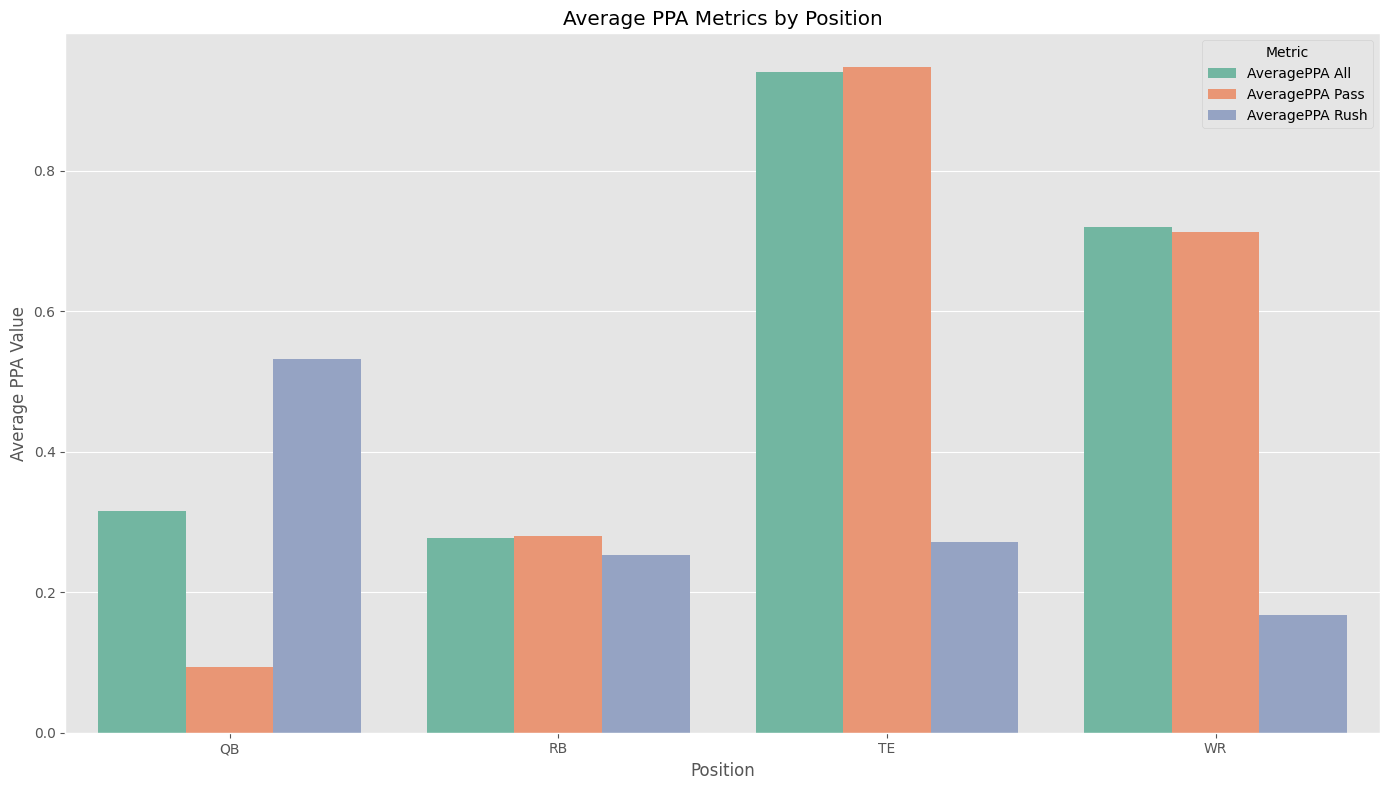

In [13]:
#reshape and plot
position_avg_melted = pd.melt(position_avg, id_vars=['Position'],
                             value_vars=avg_metrics,
                             var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Value', hue='Metric', data=position_avg_melted)
plt.title('Average PPA Metrics by Position')
plt.xlabel('Position')
plt.ylabel('Average PPA Value')
plt.tight_layout()
plt.show()


In [14]:
# Total PPA metrics by positon

total_metrics = ['TotalPPA All', 'TotalPPA Pass', 'TotalPPA Rush']
position_total = df.groupby('Position')[total_metrics].mean().reset_index()


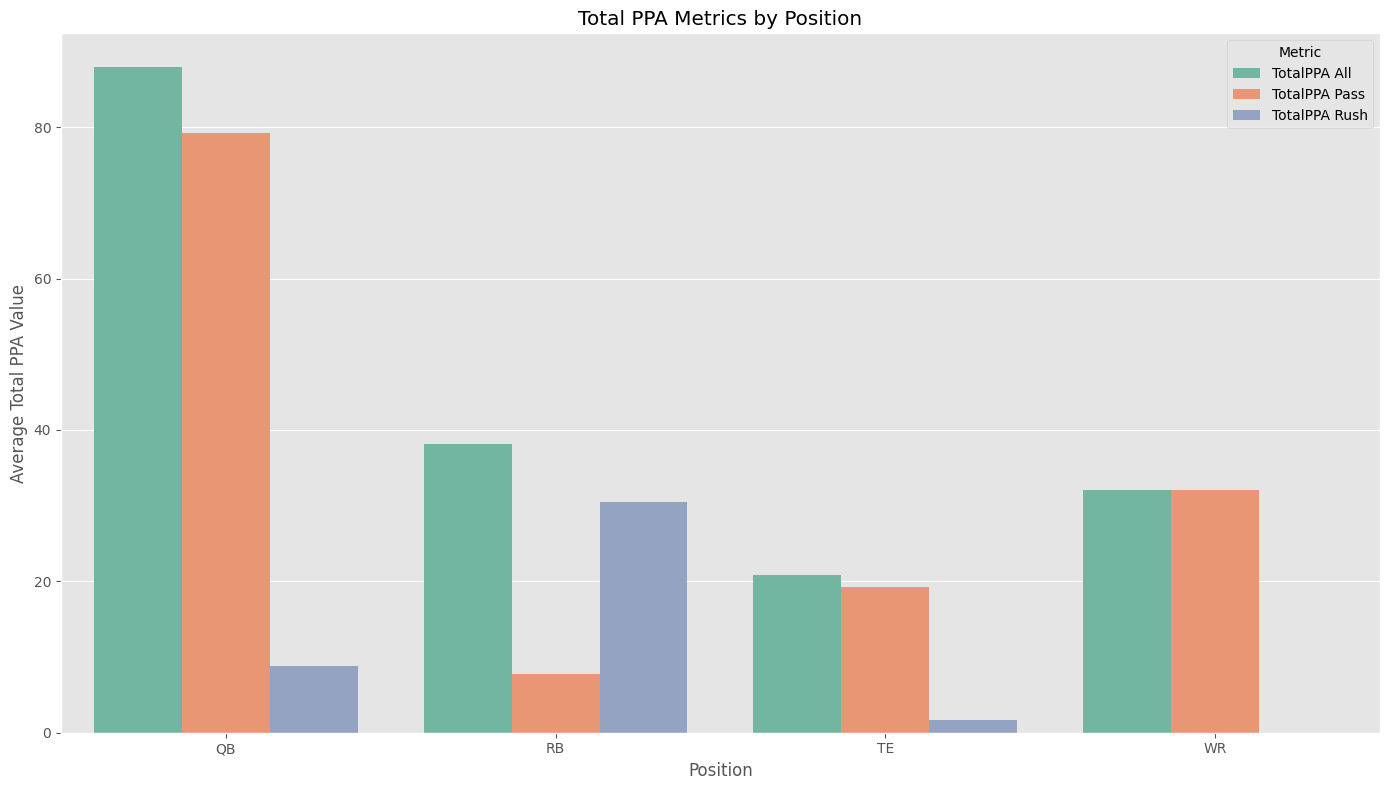

In [15]:
# reshape and plot

position_total_melted = pd.melt(position_total, id_vars=['Position'],
                               value_vars=total_metrics,
                               var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Value', hue='Metric', data=position_total_melted)
plt.title('Total PPA Metrics by Position')
plt.xlabel('Position')
plt.ylabel('Average Total PPA Value')
plt.tight_layout()
plt.show()


## Performance Based on Down  

In [16]:
down_cols = ['AveragePPA FirstDown', 'AveragePPA SecondDown', 'AveragePPA ThirdDown']
position_downs = df.groupby('Position')[down_cols].mean().reset_index()

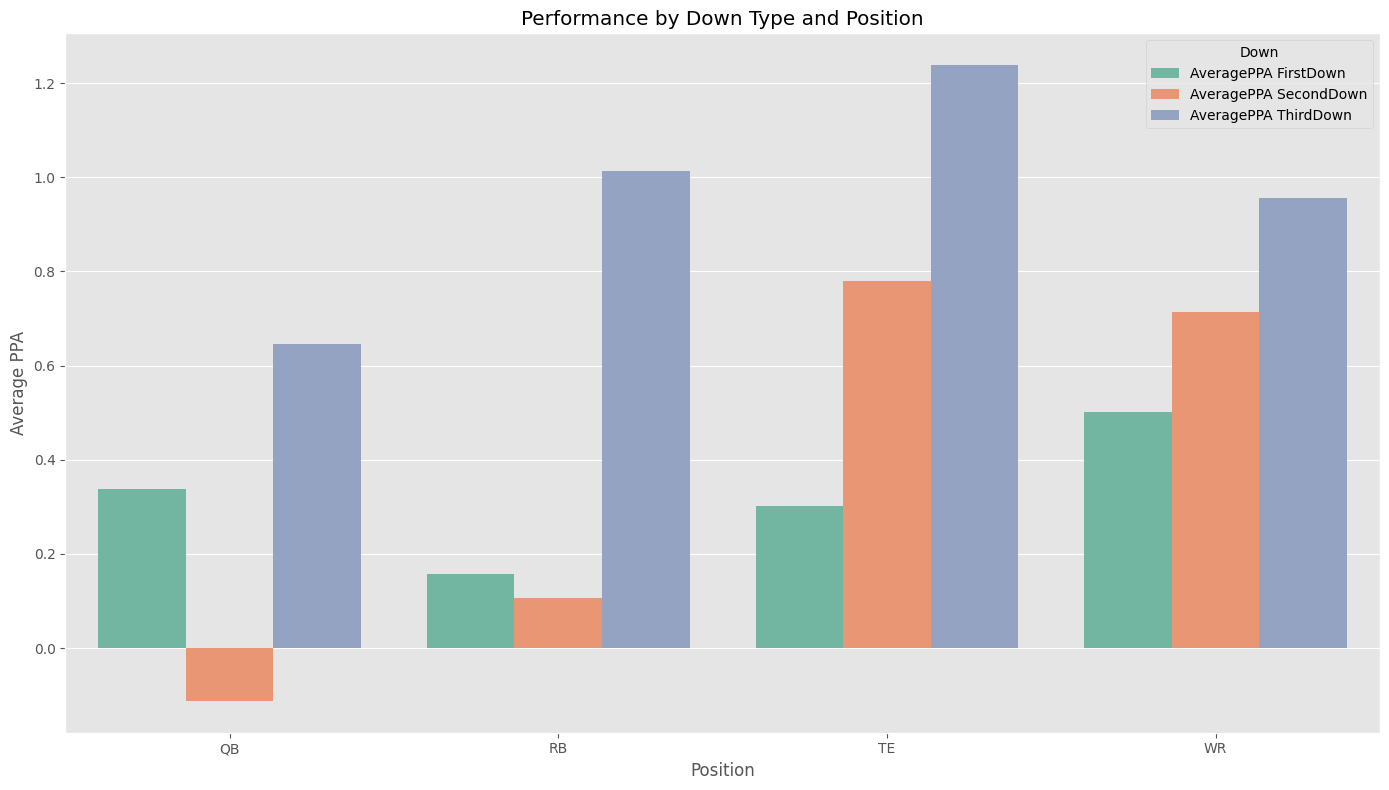

In [17]:
# Reshape and Plot

position_downs_melted = pd.melt(position_downs, id_vars=['Position'],
                               value_vars=down_cols,
                               var_name='Down', value_name='Average PPA')

plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Average PPA', hue='Down', data=position_downs_melted)
plt.title('Performance by Down Type and Position')
plt.xlabel('Position')
plt.ylabel('Average PPA')
plt.tight_layout()
plt.show()

## Correlation Analysis

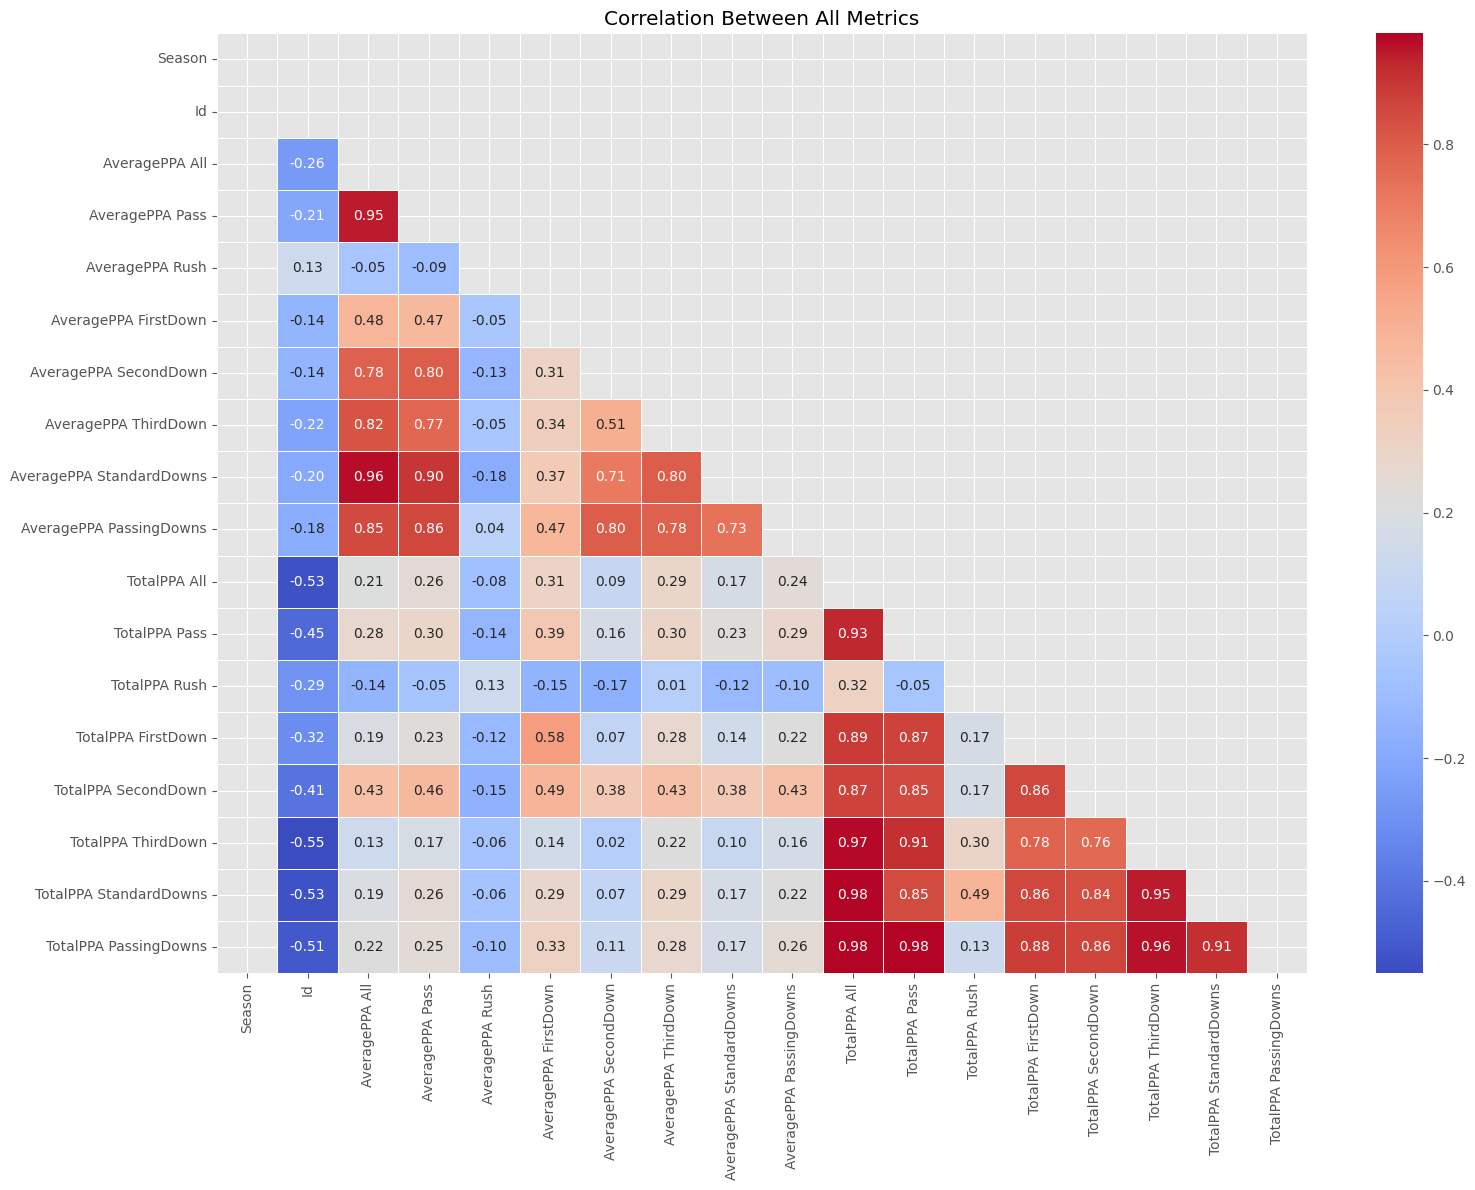

In [18]:
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between All Metrics')
plt.tight_layout()
plt.show()

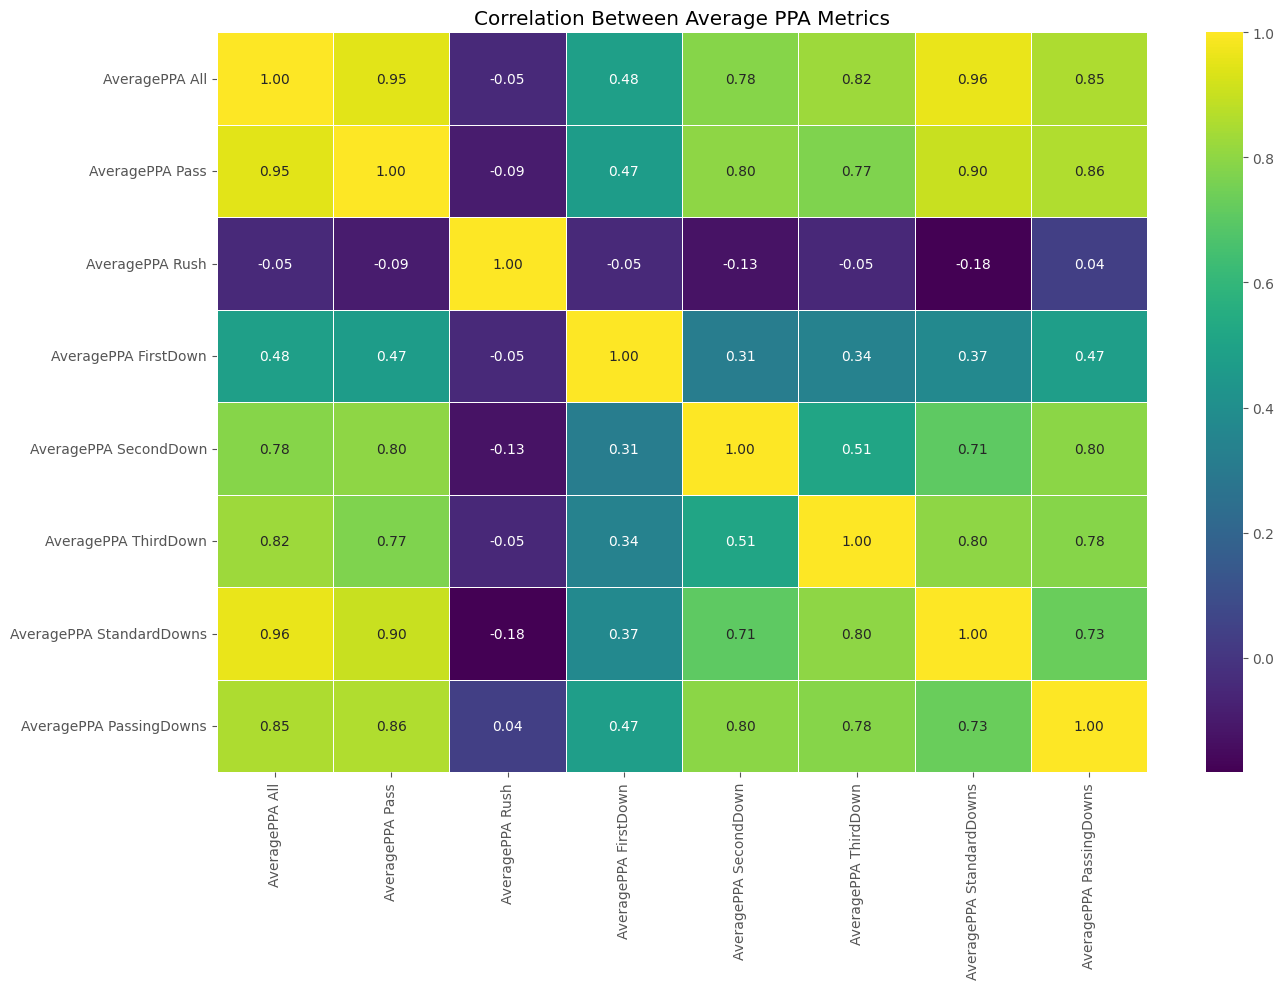

In [19]:
# Correlation Heatmap of Avg PPA Metrics

avg_ppa_cols = [col for col in df.columns if 'AveragePPA' in col]
corr_avg = df[avg_ppa_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_avg, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('Correlation Between Average PPA Metrics')
plt.tight_layout()
plt.show()

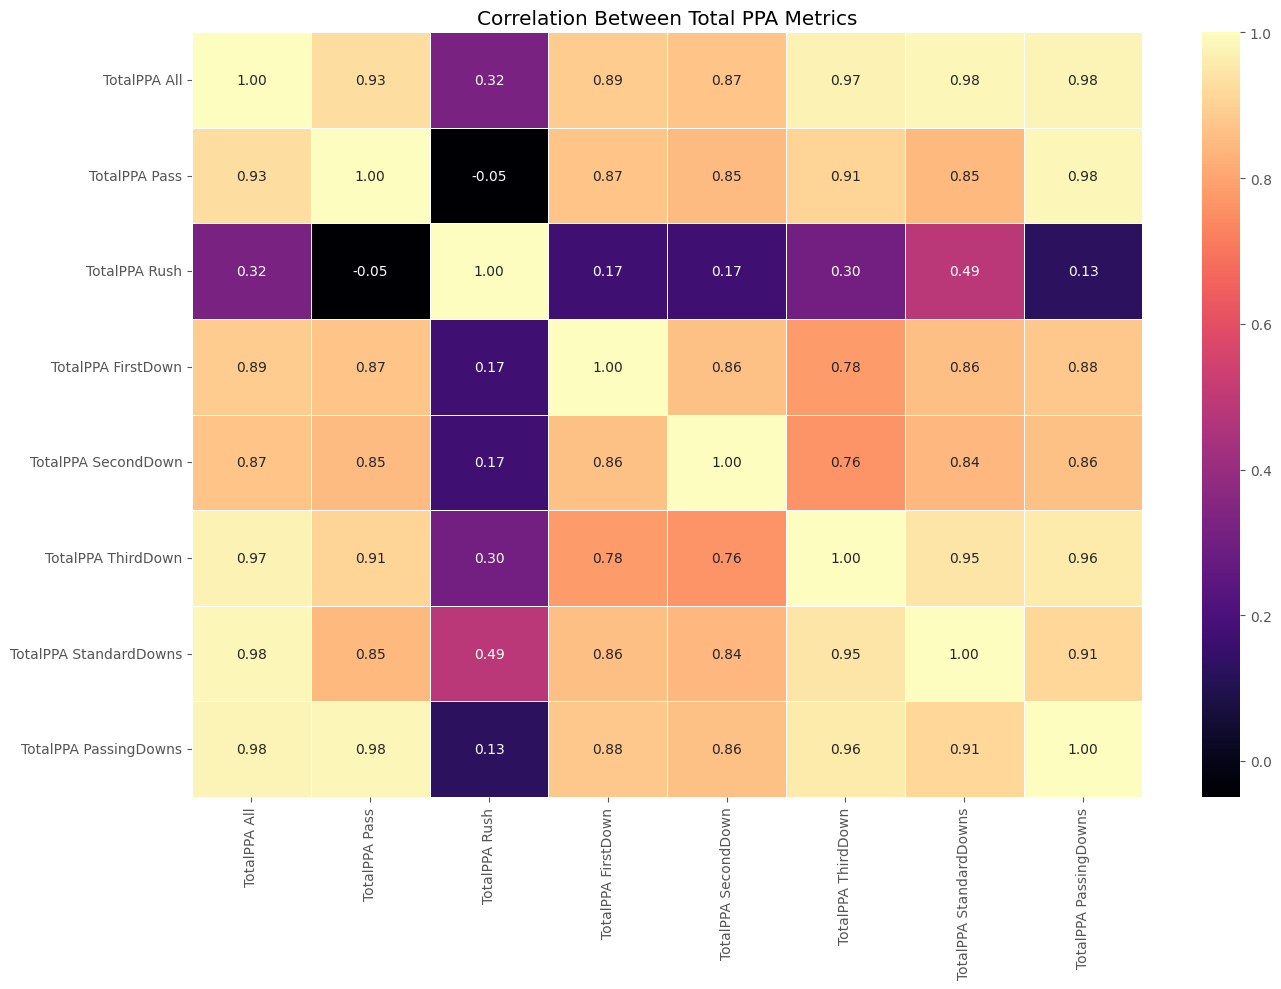

In [20]:
# Correlation Heatmap of Avg PPA Metrics

total_ppa_cols = [col for col in df.columns if 'TotalPPA' in col]
corr_total = df[total_ppa_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_total, annot=True, fmt='.2f', cmap='magma', linewidths=0.5)
plt.title('Correlation Between Total PPA Metrics')
plt.tight_layout()
plt.show()


In [21]:
# Position Specific Correlation

positions = df['Position'].unique()

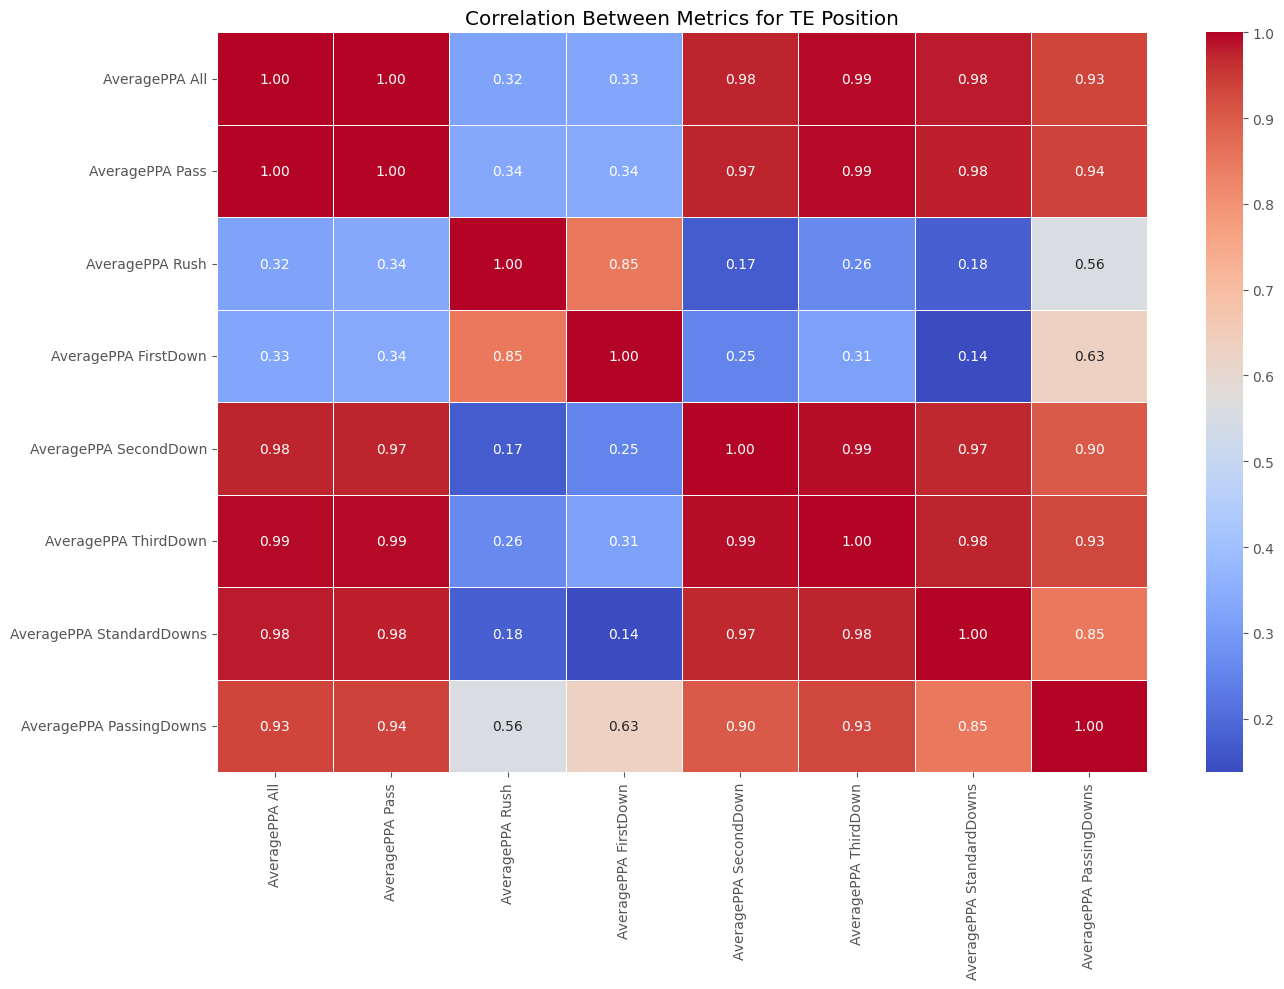

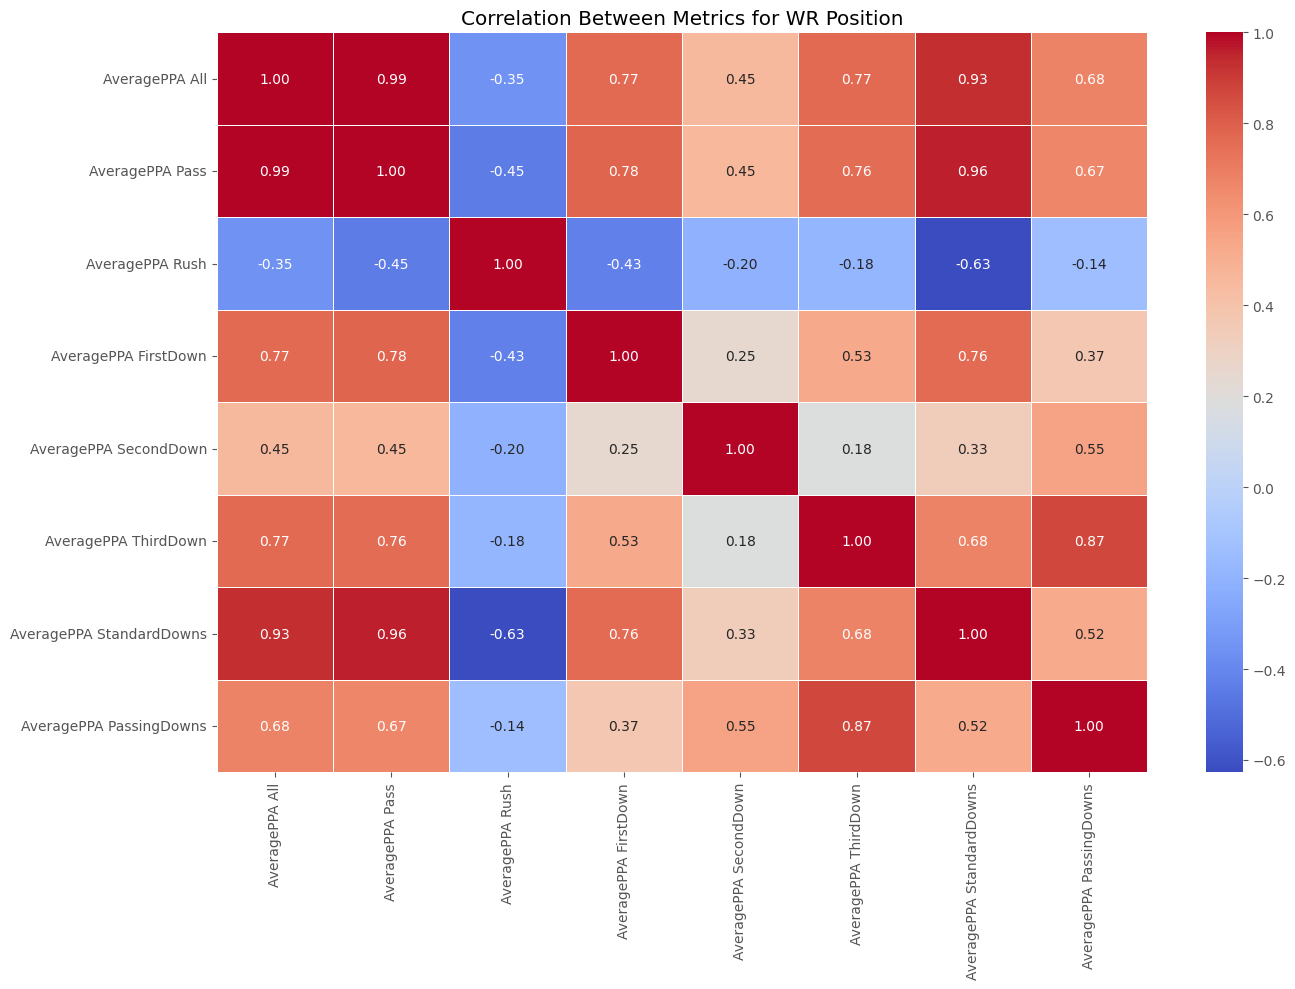

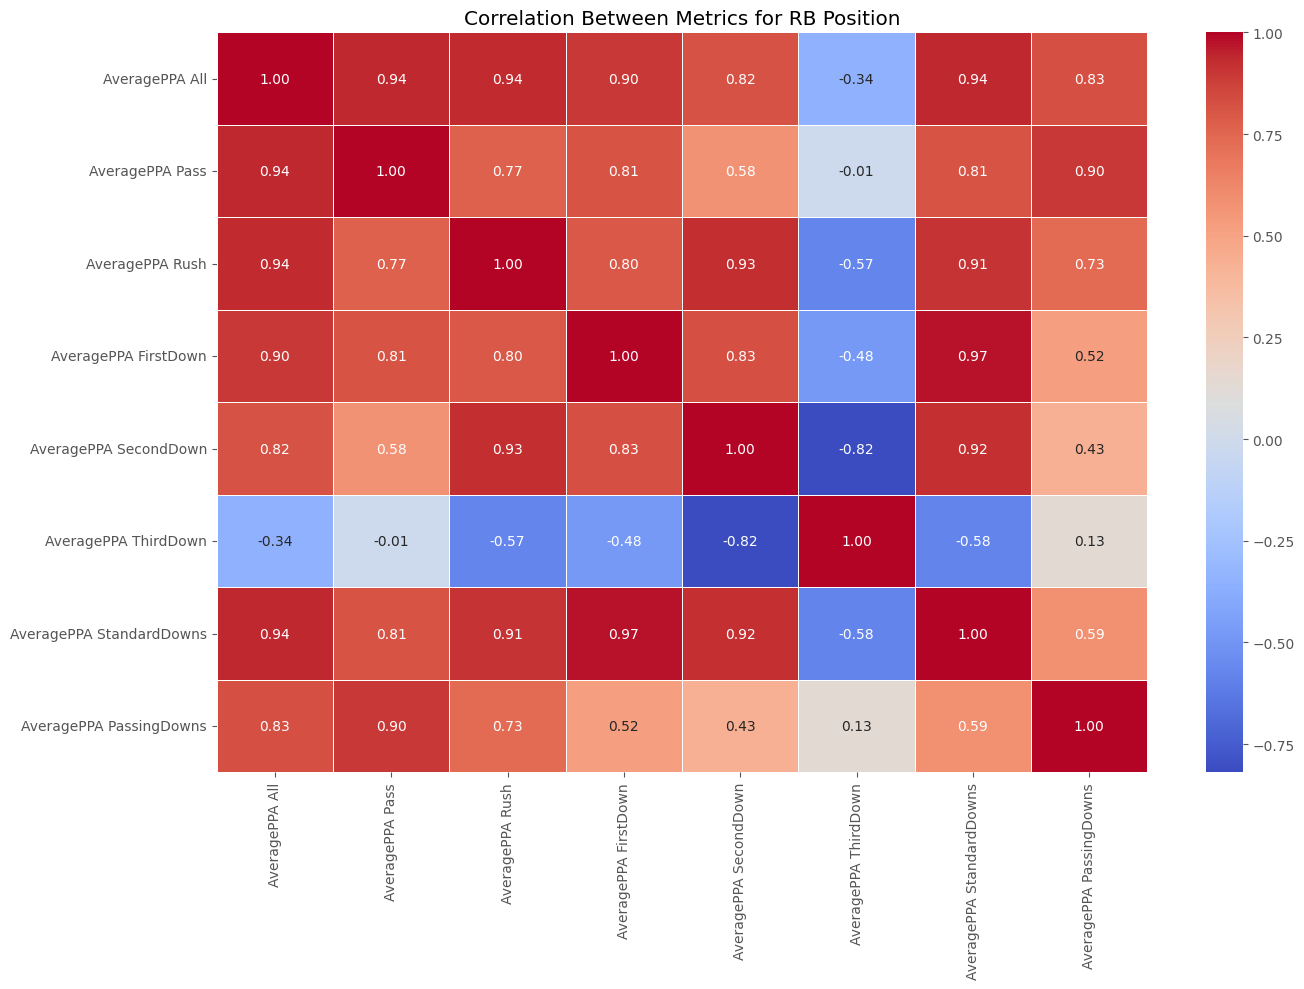

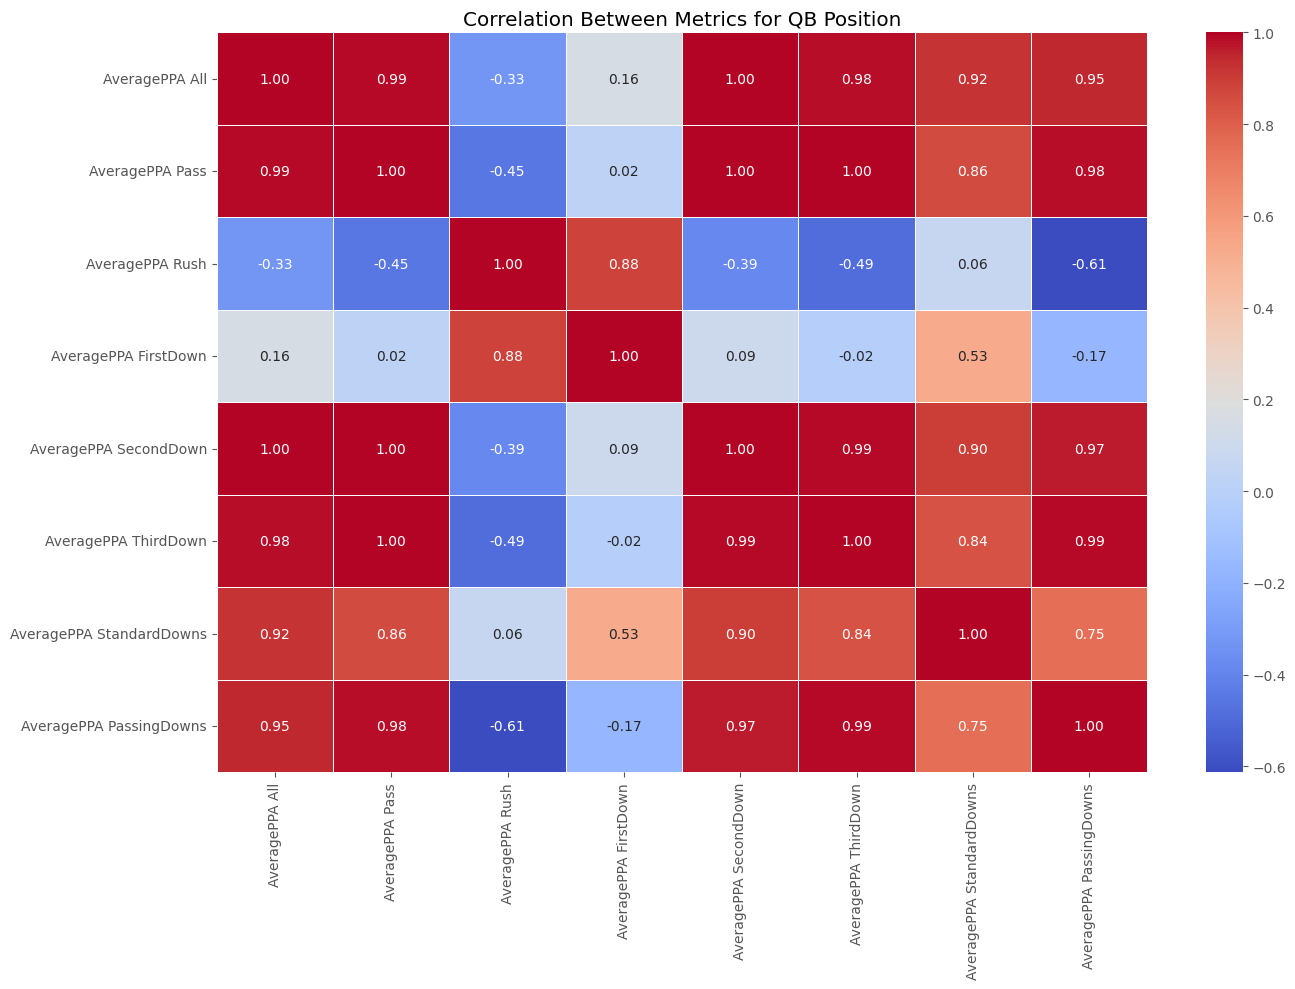

In [22]:
for position in positions:
    pos_df = df[df['Position'] == position]
    if len(pos_df) >= 3:
        plt.figure(figsize=(14, 10))
        pos_corr = pos_df[avg_ppa_cols].corr()
        sns.heatmap(pos_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
        plt.title(f'Correlation Between Metrics for {position} Position')
        plt.tight_layout()
        plt.show()

## Player Analysis  

In [23]:
# top 5 players by AveragePPA All
top_players = df.sort_values(by='AveragePPA All', ascending=False).head(5)
print("\nTop 5 Players by Average PPA:")
print(top_players[['Name', 'Position', 'AveragePPA All']])


Top 5 Players by Average PPA:
                    Name Position  AveragePPA All
20  Johncarlos Miller II       TE           2.349
19         Jalin Conyers       TE           1.554
18          Jordan Brown       WR           1.232
17             Coy Eakin       WR           1.159
16            Josh Kelly       WR           1.134


- Situational Player Analysis

In [24]:
# Finding most "clutch" player(s)

df['Clutch_Score'] = df['AveragePPA ThirdDown'] - df['AveragePPA All']


In [25]:
clutch_players = df.sort_values(by='Clutch_Score', ascending=False)
top_clutch = clutch_players.head(5)
print("Top 5 'Clutch' Players (Best on Third Down):")
print(top_clutch[['Name', 'Position', 'AveragePPA All', 'AveragePPA ThirdDown', 'Clutch_Score']])

Top 5 'Clutch' Players (Best on Third Down):
                    Name Position  AveragePPA All  AveragePPA ThirdDown  \
5         Cameron Dickey       RB           0.320                 1.482   
12          Micah Hudson       WR           0.526                 1.676   
2         Cam'Ron Valdez       RB           0.020                 1.055   
6            Tahj Brooks       RB           0.331                 1.111   
20  Johncarlos Miller II       TE           2.349                 3.076   

    Clutch_Score  
5          1.162  
12         1.150  
2          1.035  
6          0.780  
20         0.727  


In [26]:
situations = ['AveragePPA FirstDown', 'AveragePPA SecondDown', 'AveragePPA ThirdDown',
             'AveragePPA StandardDowns', 'AveragePPA PassingDowns']


In [27]:
# Best player for each situation

best_by_situation = pd.DataFrame()
for situation in situations:
    idx = df[situation].idxmax()
    best_by_situation = pd.concat([best_by_situation, df.loc[[idx]]])

In [33]:
print("Best Performer by Situation:")
for situation in situations:
    best_player = best_by_situation[best_by_situation[situation] == best_by_situation[situation].max()]
    print(f"{situation.replace('AveragePPA ', '')}: {best_player['Name'].values[0]} ({best_player['Position'].values[0]}) - {best_player[situation].values[0]:.3f}")


Best Performer by Situation:
FirstDown: Caleb Douglas (WR) - 1.267
SecondDown: Johncarlos Miller II (TE) - 1.881
ThirdDown: Johncarlos Miller II (TE) - 3.076
StandardDowns: Johncarlos Miller II (TE) - 2.803
PassingDowns: Jalin Conyers (TE) - 2.048


In [39]:
#Efficiency Metrics

df['Pass_Rush_Ratio'] = df['TotalPPA Pass'] / df['TotalPPA Rush'].replace(0, 0.001)
df['Efficiency_Ratio'] = df['TotalPPA All'] / df['AveragePPA All'].replace(0, 0.001)

In [40]:
#Most Balanced Players

df['Pass_Rush_Balance'] = abs(df['AveragePPA Pass'] - df['AveragePPA Rush'])
balanced_players = df.sort_values(by='Pass_Rush_Balance')
print("\nMost Balanced Players (Equally Good at Rushing and Passing):")
print(balanced_players.head(5)[['Name', 'Position', 'AveragePPA Pass', 'AveragePPA Rush', 'Pass_Rush_Balance']])


Most Balanced Players (Equally Good at Rushing and Passing):
               Name Position  AveragePPA Pass  AveragePPA Rush  \
1      Tyson Turner       WR           -0.056            0.000   
4   Jason Llewellyn       TE            0.089            0.000   
6       Tahj Brooks       RB            0.469            0.316   
19    Jalin Conyers       TE            1.590            1.358   
9   J'Koby Williams       RB            0.621            0.378   

    Pass_Rush_Balance  
1               0.056  
4               0.089  
6               0.153  
19              0.232  
9               0.243  
